In [1]:
pip show plotnine

Name: plotnine
Version: 0.6.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: c:\users\seoyu\anaconda3\lib\site-packages
Requires: descartes, scipy, numpy, matplotlib, mizani, patsy, statsmodels, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show missingno

Name: missingno
Version: 0.4.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: c:\users\seoyu\anaconda3\lib\site-packages
Requires: seaborn, scipy, numpy, matplotlib
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import re # 정규식
from  plotnine import *

import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')


Bad key "'font.family" on line 623 in
C:\Users\seoyu\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
# 현재 위치정보 확인
%pwd

'C:\\Users\\seoyu\\Inflearn'

In [6]:
%ls data/apt_price/

매개 변수 포맷이 틀립니다 - "pt_price".


In [7]:
pre_sale = pd.read_csv('data/apt_price/전국_평균_분양가격_2018.7월_.csv', encoding='euc-kr')
pre_sale.shape

(2890, 5)

In [8]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [9]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [10]:
# 데이터 정보 요약
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


분양가격이 object type이기 때문에 숫자타입으로 변경해야 할 필요가 있다.

In [11]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

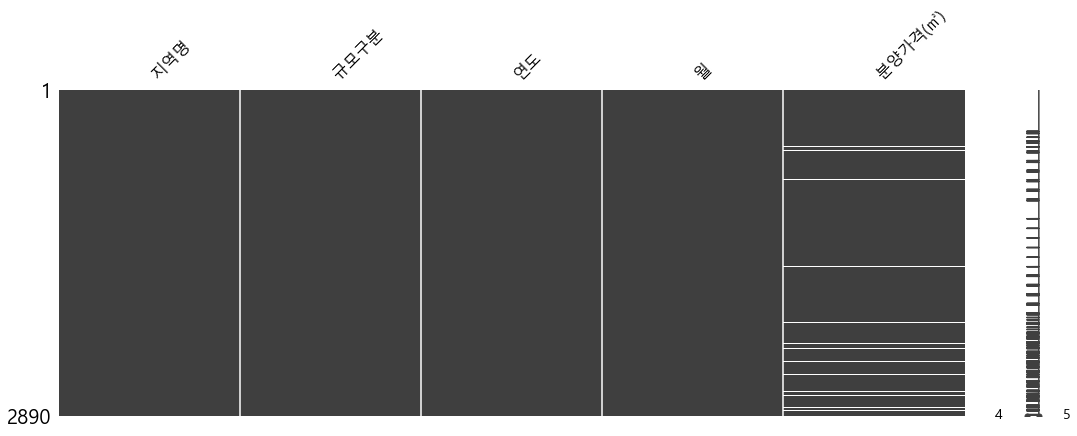

In [12]:
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [13]:
 # 연도와 월을 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경

pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [14]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [15]:
# 분양가격의 타입을 숫자로 변경 (새로운 (컬럼)을 만들어 넣음)
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')

# 평당 분양가격
pre_sale['평당분양가격']=pre_sale['분양가격'] * 3.3

In [16]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.2+ KB


In [17]:
# 분양 가격의 결측치 확인
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [18]:
# 데이터 요약
pre_sale.describe()

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [19]:
# object type 요약
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,경남,전용면적 60㎡이하,2017,6,2221
freq,170,578,1020,255,17


In [20]:
# 2017년 데이터만 불러오기
pre_sale_2017 = pre_sale.loc[pre_sale['연도']=='2017']

In [21]:
pre_sale['지역명'].value_counts()

경남    170
광주    170
경북    170
서울    170
전북    170
전남    170
대전    170
인천    170
울산    170
세종    170
대구    170
부산    170
경기    170
충북    170
제주    170
강원    170
충남    170
Name: 지역명, dtype: int64

## 전국평균 분양가격

* group by와 pivot_table활용하기

In [22]:
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    532
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,196
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,471
       50%    2,516  2,672  2,849  2,914
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    532
       mean   9,203  9,683 10,360 10,885
       std    3,224  3,536  3,655  3,947
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,154
       50%    8,303  8,818  9,402  9,616
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

### 규모별 전국 평균 분양가격

In [23]:
pre_sale.pivot_table(values='평당분양가격', index='규모구분', columns='연도')

# 따로 prameter를 지정하지 않아도 가능

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,235"
전용면적 60㎡이하,"8,952","9,399","10,246","10,912"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,464"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,483"
전체,"8,893","9,293","9,901","10,563"


 ### 전국 분양가 변동금액
 
 규모 구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴본다.

In [24]:
# 규모구분에서 전체로 되어 있는 데이터만 가져온다
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,641"
1,경기,"10,377","11,220","11,850","12,881"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,342"
4,광주,"8,052","8,899","9,464","9,638"
5,대구,"9,232","10,310","11,456","11,737"
6,대전,"8,098","8,502","9,045","9,604"
7,부산,"10,307","10,430","11,578","12,756"
8,서울,"19,725","20,663","21,376","22,329"
9,세종,"8,750","8,860","9,135","10,375"


reset_index를 하는 이유는 pivot_table을 그렸을 때 row가 2개 생성되기 때문에 데이터 분석때 편하게 하기 위해 연도를 맨 앞으로 보내 row를 1개로 바꾼다.

In [25]:
region_year['변동액'] = (region_year['2018']-region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며, 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원 이다.'.format(min_delta_price))
print('전국 평균 변동액은 평당 {:,.0f}원 이다.'.format(mean_delta_price))

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며, 상승액은 평당 5,087,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 369,000원 이다.
전국 평균 변동액은 평당 1,669,588원 이다.


In [26]:
region_year

연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,641",481
1,경기,"10,377","11,220","11,850","12,881",2503
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,342",1171
4,광주,"8,052","8,899","9,464","9,638",1585
5,대구,"9,232","10,310","11,456","11,737",2504
6,대전,"8,098","8,502","9,045","9,604",1506
7,부산,"10,307","10,430","11,578","12,756",2449
8,서울,"19,725","20,663","21,376","22,329",2603
9,세종,"8,750","8,860","9,135","10,375",1624


## 시각화

### 연도별 변동 그래프

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rc('font',family='NanumGothic')

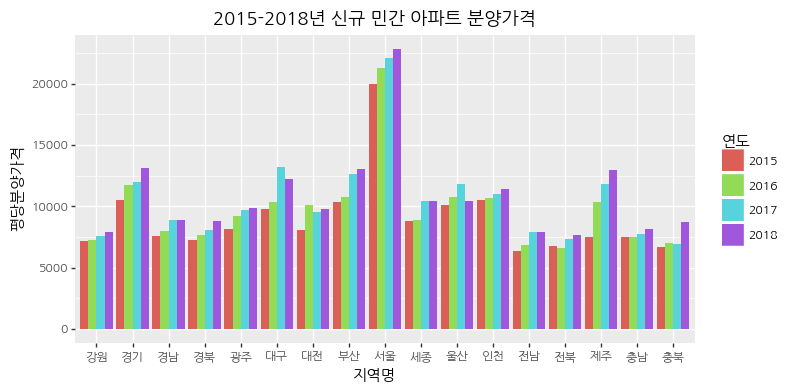

<ggplot: (141942076771)>

In [28]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumGothic'),
         figure_size=(8, 4))
)

#### seborn으로 막대그래프 그리기


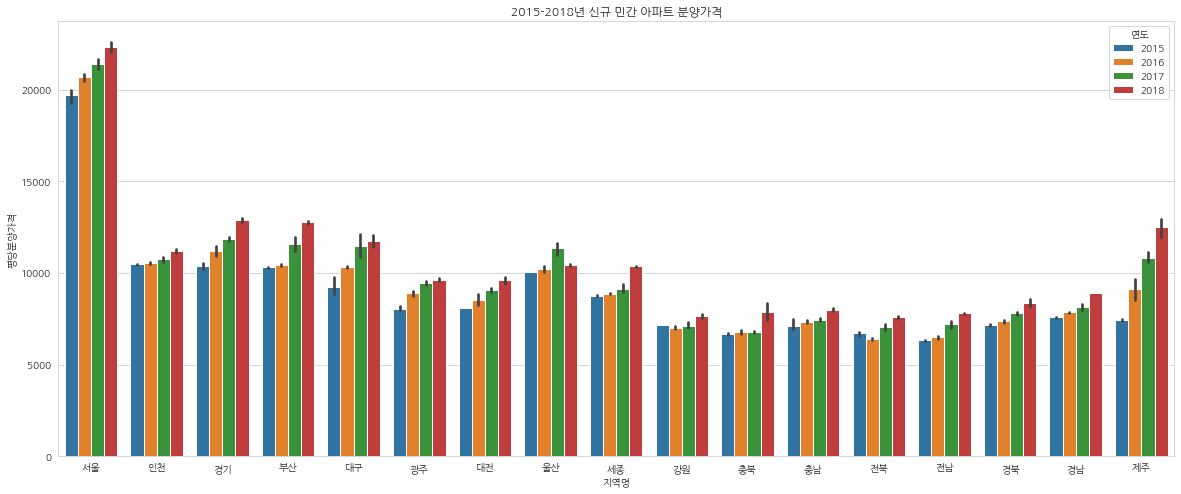

In [29]:
plt.figure(figsize=(20,8))
plt.title('2015-2018년 신규 민간 아파트 분양가격')
sns.barplot(data=region_year_all, x = '지역명', y = '평당분양가격', hue='연도')

#### pandas로 막대그래프 그리기

In [30]:
df_year_region = pd.pivot_table(region_year_all,
                               index=['지역명'], columns='연도', values='평당분양가격')
df_year_region.sample(3)

연도,2015,2016,2017,2018
지역명,,,,
대구,"9,232","10,310","11,456","11,737"
충남,"7,115","7,331","7,456","7,997"
광주,"8,052","8,899","9,464","9,638"


In [31]:
df_year_region.columns

Index(['2015', '2016', '2017', '2018'], dtype='object', name='연도')

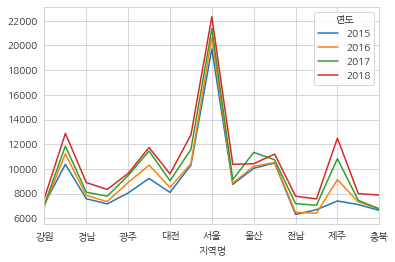

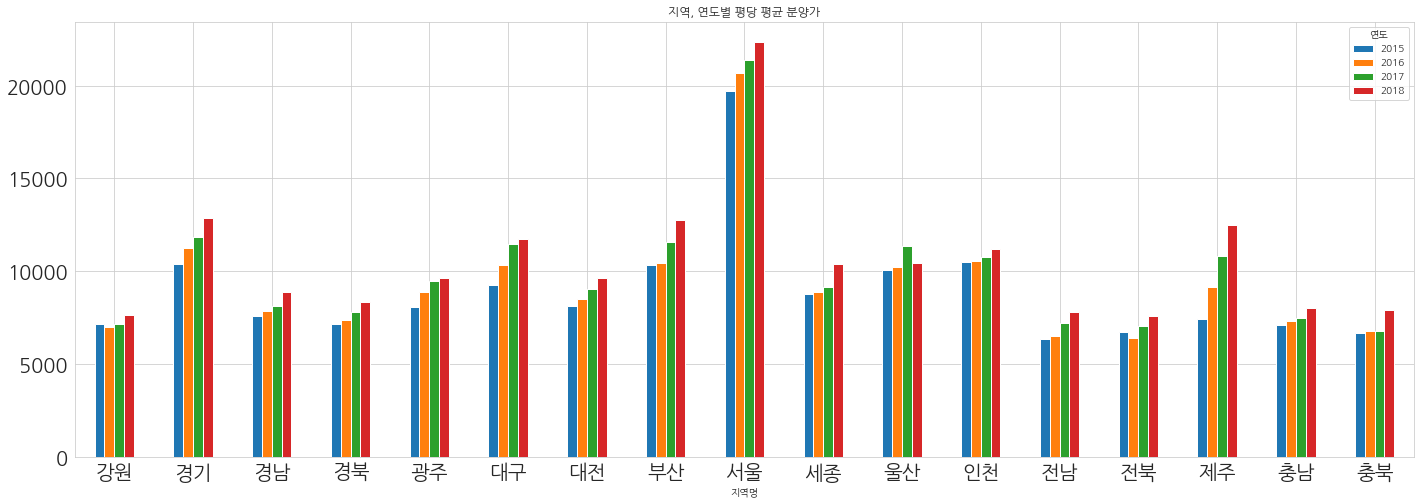

In [32]:
df_year_region.plot()
# 플롯의 기본타입은 꺾은선 그래프 형태이다

df_year_region.plot.bar(figsize=(24, 8), 
                        grid=True, fontsize=20, rot=0, 
                        title='지역, 연도별 평당 평균 분양가')
# rot = 회전 각도

### 규모별

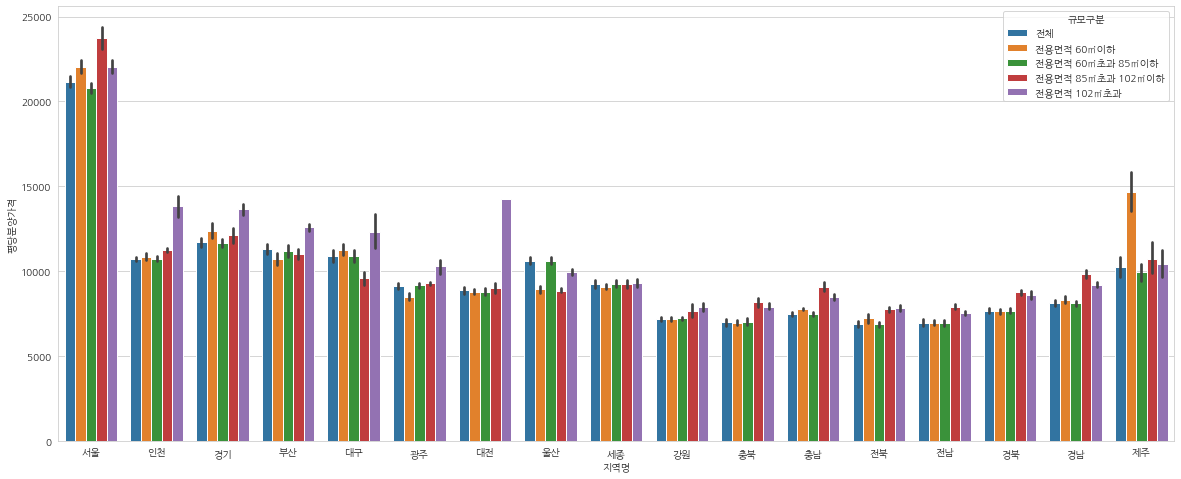

In [33]:
plt.figure(figsize=(20, 8))
sns.barplot(data=pre_sale, x='지역명', y='평당분양가격', hue='규모구분')

### 지역별 평당 분양가격 합계

In [34]:
pre_sale_size =  pre_sale.pivot_table(values='평당분양가격', index='지역명', columns='규모구분')
pre_sale_size.sample(3)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
울산,"9,974","8,965","10,641","8,861","10,619"
광주,"10,296","8,518","9,176","9,296","9,167"
대구,"12,334","11,285","10,931","9,589","10,897"


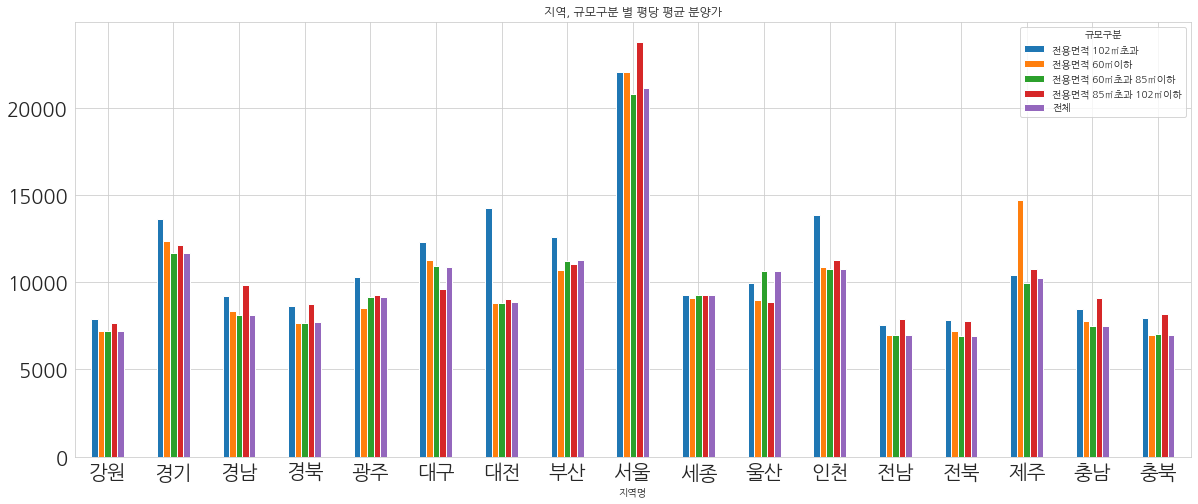

In [35]:
pre_sale_size.plot.bar(title='지역, 규모구분 별 평당 평균 분양가',
                       figsize=(20, 8), grid=True, fontsize=20, rot=0)

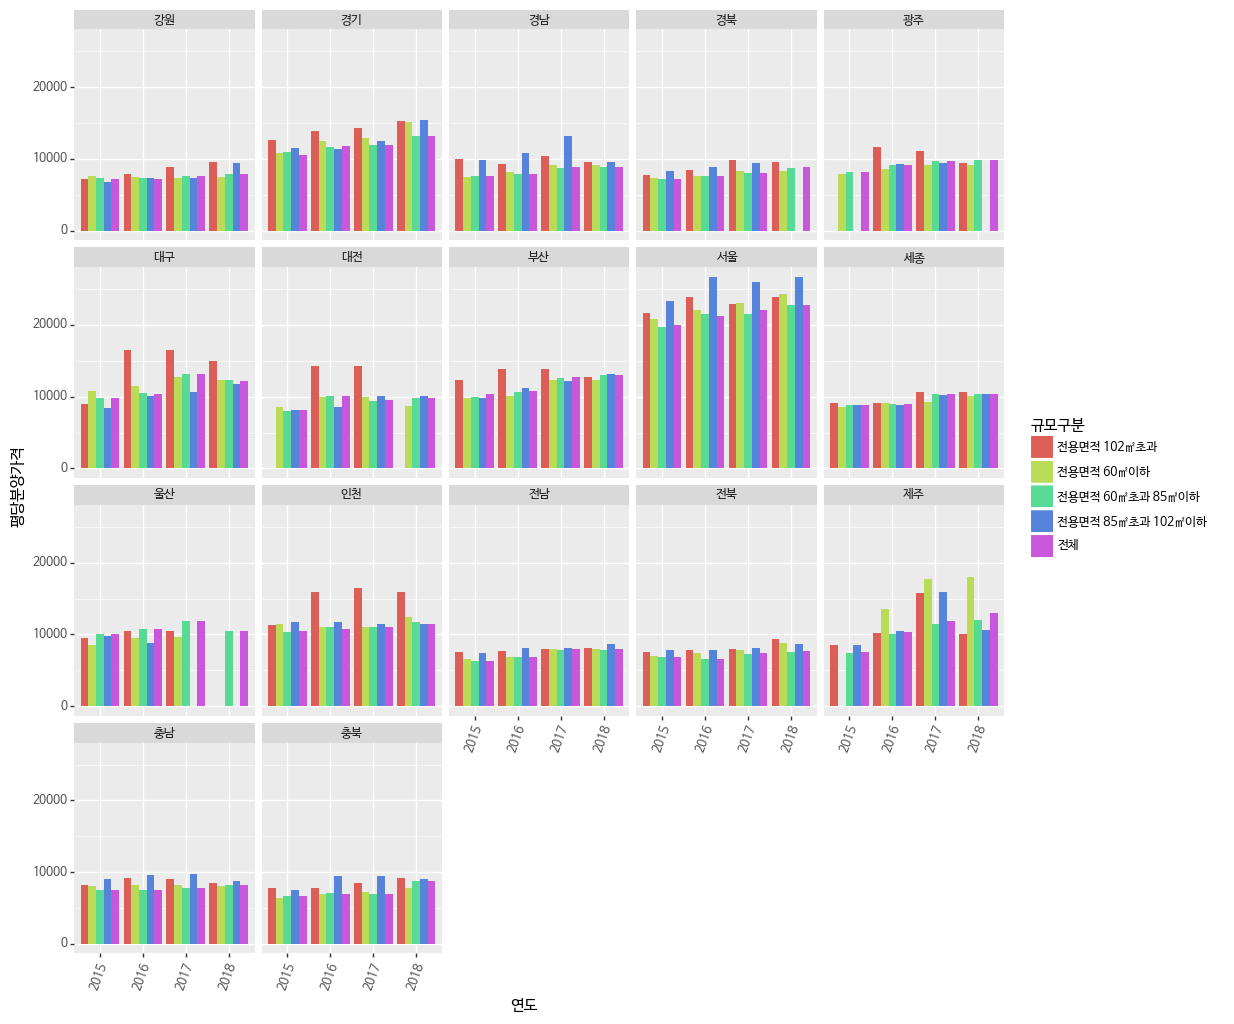

<ggplot: (-9223371894910122983)>

In [36]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

#### 특징1: 대구 지역의 전용면적 102㎡초과규모의 평균분양가격이 다른 규모에 비해 유난히 비싸다.

In [37]:
pre_sale[(pre_sale["지역명"] == "대전") & (pre_sale["규모구분"] == "전용면적 102㎡초과")]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
34,대전,전용면적 102㎡초과,2015,10,,nan,nan
119,대전,전용면적 102㎡초과,2015,11,,nan,nan
204,대전,전용면적 102㎡초과,2015,12,,nan,nan
289,대전,전용면적 102㎡초과,2016,1,,nan,nan
374,대전,전용면적 102㎡초과,2016,2,NaN,nan,nan
459,대전,전용면적 102㎡초과,2016,3,NaN,nan,nan
544,대전,전용면적 102㎡초과,2016,4,NaN,nan,nan
629,대전,전용면적 102㎡초과,2016,5,NaN,nan,nan
714,대전,전용면적 102㎡초과,2016,6,NaN,nan,nan
799,대전,전용면적 102㎡초과,2016,7,NaN,nan,nan


대전 지역에서 전용면적 102㎡초과인 경우 2016년 10월 부터 2017년 9월까지를 제외한 나머지 데이터가 결측값이며, 결측값이 아닌 경우는 모두 같은 값을 갖기 때문에 편차가 존재하지 않아 신뢰구간이 그래프에 나타나지 않으며, 상대적으로 큰 값을 갖는다.

#### 특징2: 제주 지역의 전용면적 60㎡ 이하규모의 평균분양가격이 다른 규모에 비해 비싸다

In [38]:
pre_sale[(pre_sale["지역명"] == "제주") & (pre_sale["규모구분"] == "전용면적 60㎡이하")]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
81,제주,전용면적 60㎡이하,2015,10,,nan,nan
166,제주,전용면적 60㎡이하,2015,11,,nan,nan
251,제주,전용면적 60㎡이하,2015,12,,nan,nan
336,제주,전용면적 60㎡이하,2016,1,,nan,nan
421,제주,전용면적 60㎡이하,2016,2,NaN,nan,nan
506,제주,전용면적 60㎡이하,2016,3,NaN,nan,nan
591,제주,전용면적 60㎡이하,2016,4,2853,"2,853","9,415"
676,제주,전용면적 60㎡이하,2016,5,2853,"2,853","9,415"
761,제주,전용면적 60㎡이하,2016,6,2853,"2,853","9,415"
846,제주,전용면적 60㎡이하,2016,7,2853,"2,853","9,415"


특별히 결측값이 많지않다. 다만 최근 제주로 이사가는 젊은 부부가 증가하여 작은 면적의 분양가가 높아졌다고 조심스럽게 추측할 수 있다.

## 전국 규모(면적)별 신규 민간 아파트 분양가격

In [39]:
pre_sale.sample()
pre_sale[["지역명", "평당분양가격", "규모구분"]].sample(3)

,지역명,평당분양가격,규모구분
1478,대전,"8,580",전용면적 85㎡초과 102㎡이하
2464,제주,"9,996",전용면적 102㎡초과
1886,부산,"11,408",전용면적 60㎡이하


In [40]:
# 결측치 확인
pre_sale['평당분양가격'].isnull().sum()

232

In [41]:
# 결측치가 있으면 시각화에 어려움이 있기 때문에 drop
pre_sale['평당분양가격'].dropna(inplace=True, axis=0)

In [42]:
# 결측치 확인 -> 결측치 제거 완료
pre_sale['평당분양가격'].isnull().sum()

0

In [43]:
pre_sale.shape
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [44]:
# 평당분양가격의 데이터타입을 수치형으로 변경
pre_sale['평당분양가격'].astype(int)

0       19275
1       18651
2       19410
3       18879
4       19400
        ...  
2884     9368
2885    11002
2887    11074
2888    10645
2889     9867
Name: 평당분양가격, Length: 2658, dtype: int32

In [45]:
pre_sale['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [46]:
pre_sale_price.sample(3)

349     3408
2372    2666
1077    2243
Name: 분양가격(㎡), dtype: object

### box - and - whisker plot | diagram

* 지역별 평당 분양가격

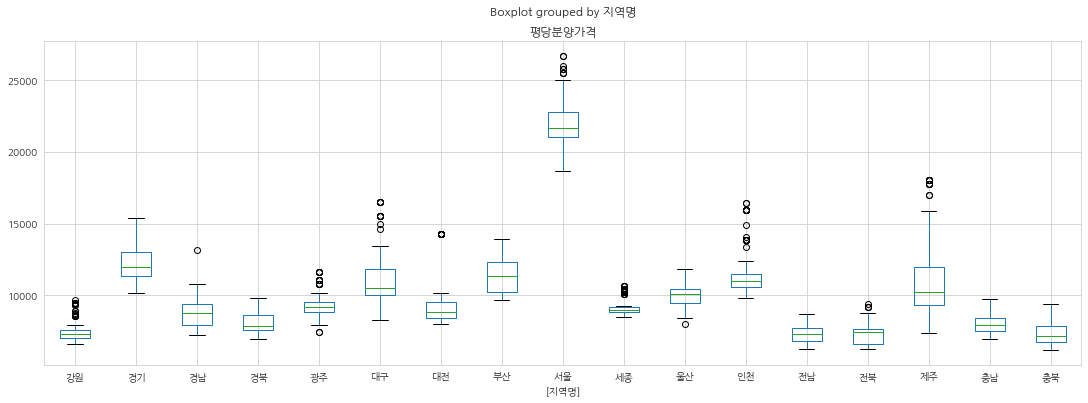

In [47]:
pre_sale[['지역명', '평당분양가격']].boxplot(by=['지역명'],figsize=(18,6) )

* 지역 및 연도별 평당 분양가격

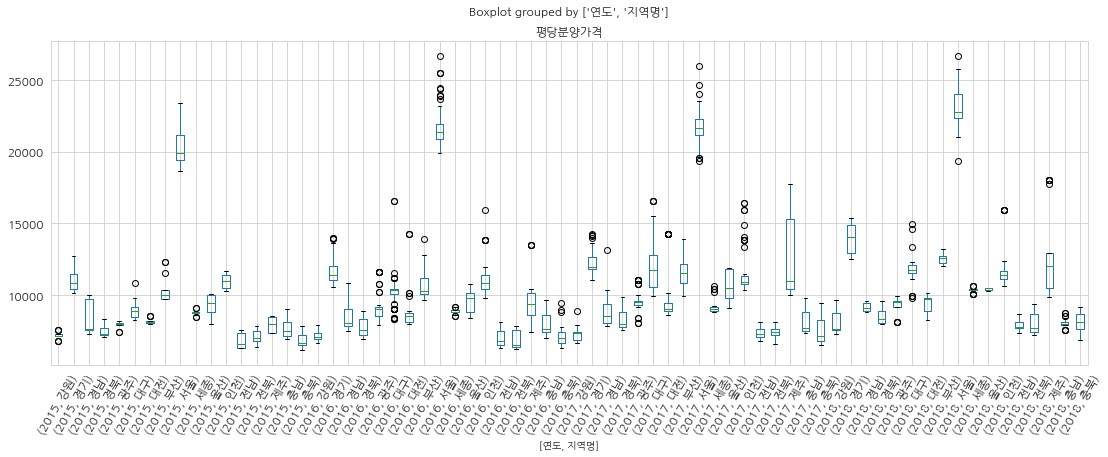

In [48]:
pre_sale[['연도', '지역명', '평당분양가격']].boxplot(
    by=['연도', '지역명'],
    figsize=(18,6),
    fontsize=12,
    rot=60)

* 서울지역의 평당분양가격

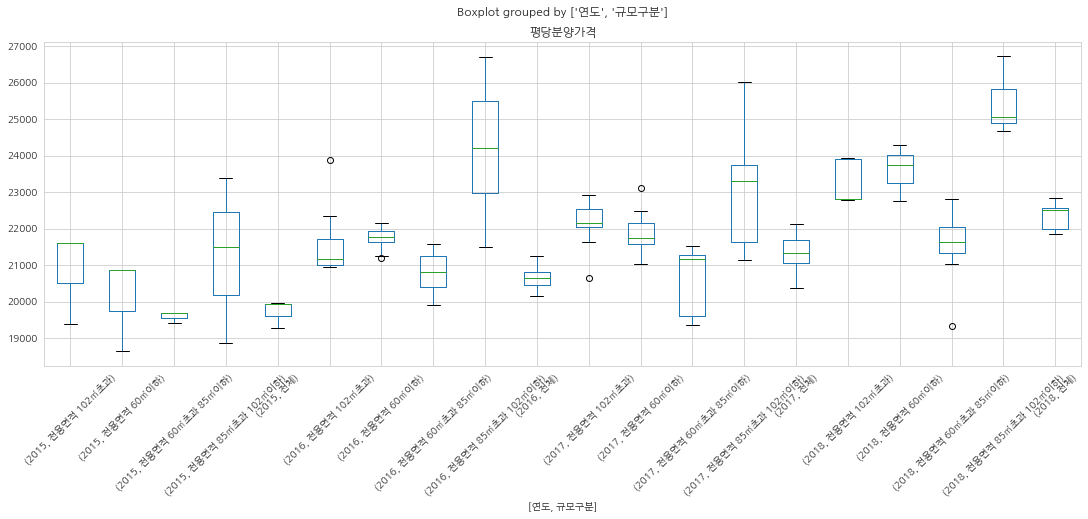

In [49]:
pre_sale_seoul = pre_sale[pre_sale['지역명'] == '서울']
pre_sale_seoul[['연도', '규모구분', '평당분양가격']].boxplot(
    by=['연도', '규모구분'],
    figsize=(18,6),
    rot=45
)

* 제주의 연도별 평당분양가격

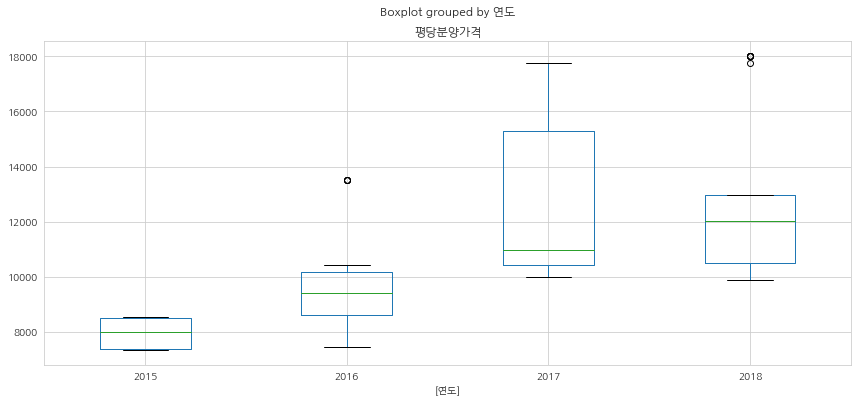

In [50]:
pre_sale_jeju = pre_sale[pre_sale['지역명'] == '제주']
pre_sale_jeju[['연도', '평당분양가격']].boxplot(
    by = ['연도'],
    figsize=(14,6))

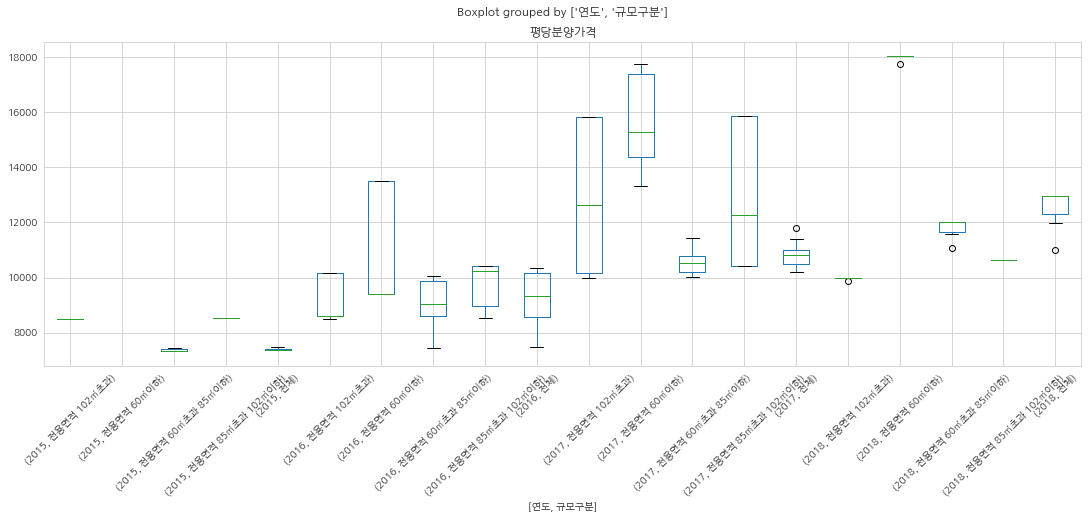

In [51]:
pre_sale_jeju[['연도', '규모구분', '평당분양가격']].boxplot(
    by = ['연도', '규모구분'],
    figsize = (18,6), rot = 45)

## Tidy Data 만들기

In [52]:
df = pd.read_csv('data/apt_price/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', \
                 encoding='euc-kr', skiprows=1, header=0, engine='python')

df.shape

(23, 27)

* 컬럼 변경하기

In [53]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477


In [54]:
# 첫번째 행을 연도, 두번째 행을 월로 지정
year = df.iloc[0]
month = df.iloc[1]

loc : 인덱스 기준으로 행데이터 읽기  
iloc : 행번호를 기준으로 행데이터 읽기  
참고: https://devpouch.tistory.com/47

In [55]:
year

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

* 컬럼을 새로 만들기 위해 0번째와 1번째 행을 합쳐준다

In [56]:
for i, y in enumerate(year):
    if i > 2 and i <15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i >= 15:
        year[i] = ' '.join(['2015년', month[i]])
    elif i ==1:
        year[i] = '시군구'
    elif i==2:
        year[i] = ' '.join([year[i], month[i]])
        # year[i] = ' '.join(['2013년', month[i]])
        
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


enumerate: '열거하다'의 의미로 리스트가 있는경우 순서와 리스트값을 전달(순서가 있는 자료리턴)  
A.join('B', C[i]) # A로 B와 C[i]를 연결한다

In [57]:
# 열이름을 지정한다
df.columns = year

In [58]:
# 기존에 있던 0번째, 1번재 행을 지워 저장한다
df = df.drop(df.index[[0,1]])

* 지역컬럼을 새로 만들어 시도와 시군구 합치기

In [ ]:
#최근 데이터의 컬럼으로 기존 데이터프레임과 합치기 위해 컬럼명을 확인
pre_sale.colunms

In [59]:
# 결측치를 빈문자로 채움
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [60]:
df['지역'] = df['구분'] + df['시군구']
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [61]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [105]:
pd.melt?

Signature:
pd.melt(
    frame,
    id_vars=None,
    value_vars=None,
    var_name=None,
    value_name='value',
    col_level=None,
)
Docstring:
Unpivot a DataFrame from wide format to long format, optionally
leaving identifier variables set.

This function is useful to massage a DataFrame into a format where one
or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to
the row axis, leaving just two non-identifier columns, 'variable' and
'value'.

Parameters
----------
frame : DataFrame
id_vars : tuple, list, or ndarray, optional
    Column(s) to use as identifier variables.
value_vars : tuple, list, or ndarray, optional
    Column(s) to unpivot. If not specified, uses all columns that
    are not set as `id_vars`.
var_name : scalar
    Name to use for the 'variable' column. If None it uses
    ``frame.columns.name`` or 'variable'.
value_name : scalar, default 'value'
    Name to use for the 'value'

In [62]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
1,서울,전용면적 60㎡이하,2015,10,5652,"5,652","18,652"
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,"5,882","19,411"
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,"5,721","18,879"
4,서울,전용면적 102㎡초과,2015,10,5879,"5,879","19,401"


In [63]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
       '2015년 7월', '2015년 8월', '2015년 9월'])

df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


melt: 자료의 재구조화
![title](https://t1.daumcdn.net/cfile/tistory/25177F4E5863D58A0C)

In [64]:
year_test = ['2013', '12월']
year_test[1].strip().replace('월','')

'12'

In [65]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [113]:
#'년'을 기준으로 분리 -> 그중 첫번째가 연도를 나타냄
for y in year:
    print(y.split('년')[0])
    
year_test = ['2013', '12월']
# 공백을 제거하여 문자열로 출력
year_test[1].strip()

#'월'을 제거하고 출력(replace: 문자열 제거 및 수정)
#replace(old,new,[count])
year_test[1].strip().replace('월', '')

구분
시군구
2013
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015


'12'

In [66]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(
    lambda year_month : year_month.split('년')[0])

df_2013_2015['월'] = df_2013_2015['기간'].apply(
    lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())

In [67]:
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


* 지역명 정리하기

In [68]:
df_2013_2015['지역'].value_counts()

           44
전국         22
경기         22
세종         22
인천         22
울산         22
충북         22
제주         22
전남         22
대구         22
대전         22
충남         22
수도권        22
경북         22
서울         22
지방강원       22
6대광역시부산    22
전북         22
광주         22
경남         22
Name: 지역, dtype: int64

In [69]:
df_2013_2015['지역'] = df_2013_2015['지역'].replace('6대광역시부산', '부산')
df_2013_2015['지역'] = df_2013_2015['지역'].replace('지방강원', '강원')

df_2013_2015['지역'].value_counts()

       44
전국     22
경기     22
강원     22
세종     22
인천     22
경남     22
울산     22
충북     22
제주     22
대전     22
대구     22
부산     22
충남     22
수도권    22
경북     22
서울     22
전북     22
광주     22
전남     22
Name: 지역, dtype: int64

* 분양가에 있는 ,제거하기 + 숫자타입으로 바꿔주기

In [70]:
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',','').astype(int)

In [71]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 6 columns):
지역      462 non-null object
기간      462 non-null object
분양가     462 non-null object
연도      462 non-null object
월       462 non-null object
분양가격    462 non-null int32
dtypes: int32(1), object(5)
memory usage: 20.0+ KB


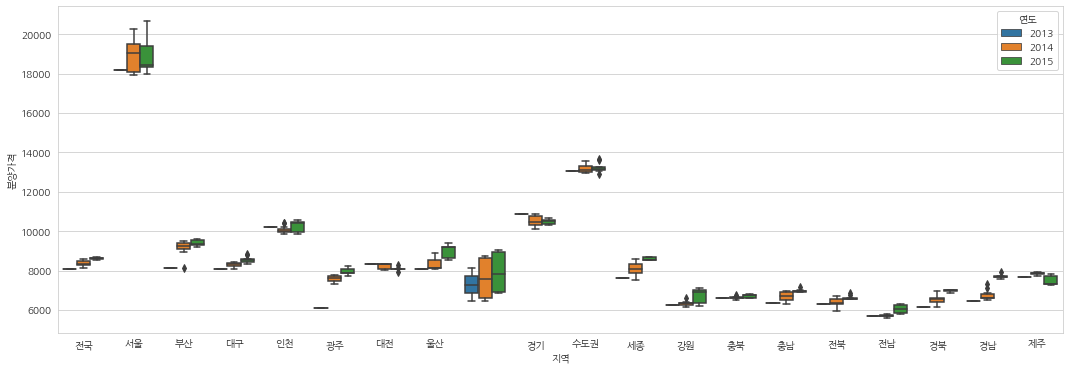

In [72]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df_2013_2015, x='지역', y='분양가격', hue='연도')

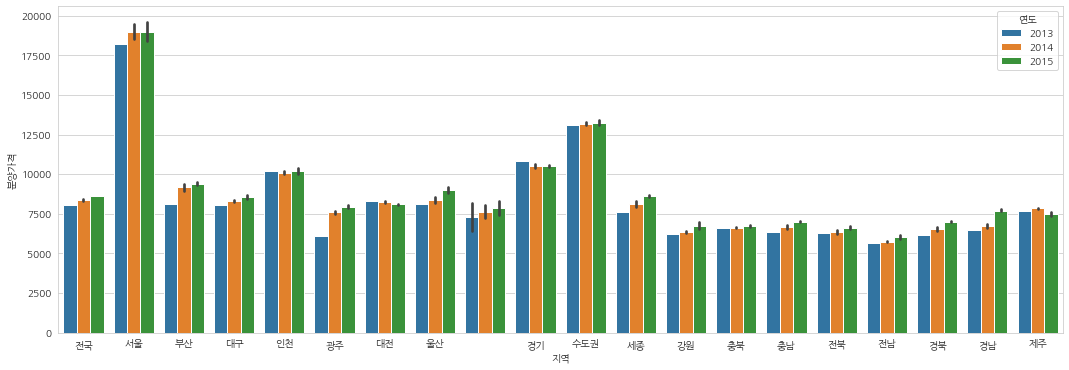

In [73]:
plt.figure(figsize=(18,6))
sns.barplot(data=df_2013_2015, x='지역', y='분양가격', hue='연도')

In [74]:
df_2013_2015[df_2013_2015.isnull()].shape

(462, 6)

## 2013년 ~ 2018년 7월까지 데이터 합치기

In [75]:
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체']
print(df_2015_2018.shape)
df_2015_2018.head()

(578, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,438"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,270"
20,대구,전체,2015,10,2682,"2,682","8,851"


In [76]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [77]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]

In [78]:
df_2013_2015_prepare.columns = ['지역명', '연도','월', '평당분양가격']
df_2013_2015_prepare.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [79]:
df_2015_2018

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,438"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,270"
20,대구,전체,2015,10,2682,"2,682","8,851"
...,...,...,...,...,...,...,...
2865,전북,전체,2018,7,2333,"2,333","7,699"
2870,전남,전체,2018,7,2357,"2,357","7,778"
2875,경북,전체,2018,7,2674,"2,674","8,824"
2880,경남,전체,2018,7,2696,"2,696","8,897"


In [80]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"


In [81]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

(1040, 4)

In [82]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
1,서울,2013,12,"18,189"
2,부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"


In [83]:
df_2013_2018.tail()

,지역명,연도,월,평당분양가격
2865,전북,2018,7,"7,699"
2870,전남,2018,7,"7,778"
2875,경북,2018,7,"8,824"
2880,경남,2018,7,"8,897"
2885,제주,2018,7,"11,002"


In [84]:
df_2013_2015_region = df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [85]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

2013년도 부터의 자료(df_2013_2015_region)와 2015년도 부터의 자료(df_2015_2018_region)의 고유 지역명이 다른것을 확인할 수 있다.

In [86]:
df_2013_2018.shape

(1040, 4)

In [91]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head

<bound method NDFrame.head of      지역명    연도   월  평당분양가격
0     전국  2013  12   8,059
10   수도권  2013  12  13,083
21    전국  2014   1   8,130
31   수도권  2014   1  12,995
42    전국  2014   2   8,195
52   수도권  2014   2  13,041
63    전국  2014   3   8,204
73   수도권  2014   3  13,069
84    전국  2014   4   8,289
94   수도권  2014   4  12,991
105   전국  2014   5   8,358
115  수도권  2014   5  13,312
126   전국  2014   6   8,344
136  수도권  2014   6  13,064
147   전국  2014   7   8,333
157  수도권  2014   7  12,947
168   전국  2014   8   8,395
178  수도권  2014   8  13,127
189   전국  2014   9   8,459
199  수도권  2014   9  13,293
210   전국  2014  10   8,488
220  수도권  2014  10  13,391
231   전국  2014  11   8,569
241  수도권  2014  11  13,539
252   전국  2014  12   8,584
262  수도권  2014  12  13,556
273   전국  2015   1   8,605
283  수도권  2015   1  13,693
294   전국  2015   2   8,602
304  수도권  2015   2  13,634
315   전국  2015   3   8,563
325  수도권  2015   3  13,253
336   전국  2015   4   8,613
346  수도권  2015   4  13,155
357   전국  2015   5   8,62

dataframe.str.match(''):  
데이터프레임을 문자화 시켜 ''와 일치하는 자료 추출 

In [92]:
df_2013_2018.drop(
    df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index,
    axis = 0,
    inplace=True)
df_2013_2018.drop(
    df_2013_2018.loc[df_2013_2018['지역명'] == ''].index,
    axis=0,
    inplace=True
)

In [93]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head

<bound method NDFrame.head of Empty DataFrame
Columns: [지역명, 연도, 월, 평당분양가격]
Index: []>

## 2013년 12월 ~ 2018년 7월 전국 신규 민간 아파트 분양가격 동향 시각화

* Pandas

In [96]:
df_year_mean = df_2013_2018.groupby(['연도'])['평당분양가격'].mean()
df_year_mean

연도
2013    8,059
2014    8,362
2015    8,667
2016    9,322
2017    9,901
2018   10,563
Name: 평당분양가격, dtype: float64

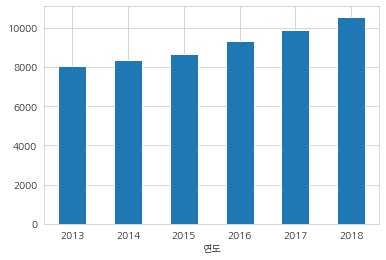

In [97]:
df_year_mean.plot.bar(rot=0)

* seaborn

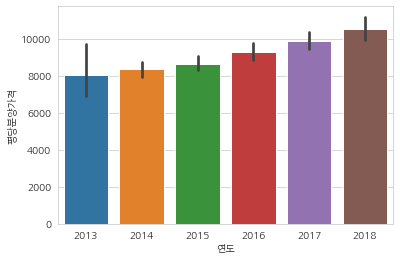

In [98]:
sns.barplot(data=df_2013_2018, x='연도', y = '평당분양가격')

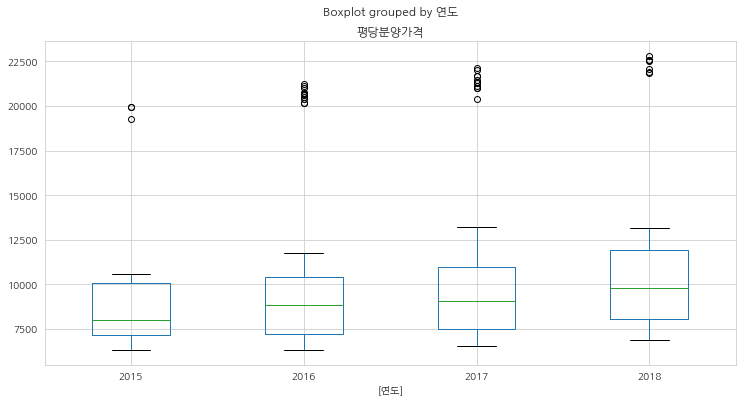

In [99]:
df_2015_2018_prepare[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12,6))

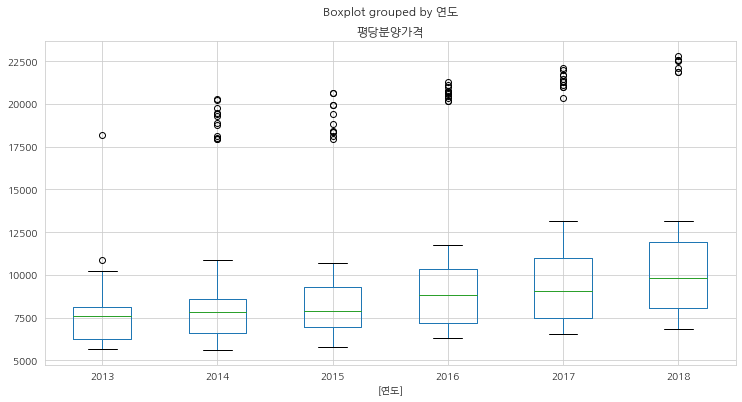

In [100]:
df_2013_2018[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12,6))

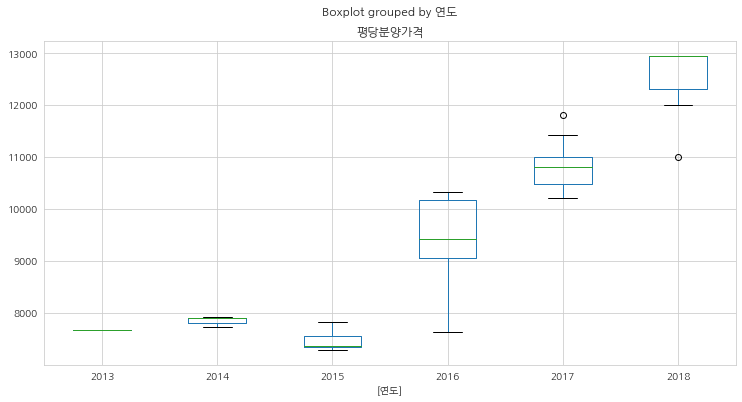

In [101]:
df_2013_2018_jeju = df_2013_2018[df_2013_2018['지역명'] == '제주']
df_2013_2018_jeju[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12,6))

In [102]:
df_2013_2018_jeju['연도'].value_counts()

2017    12
2015    12
2014    12
2016    10
2018     7
2013     1
Name: 연도, dtype: int64